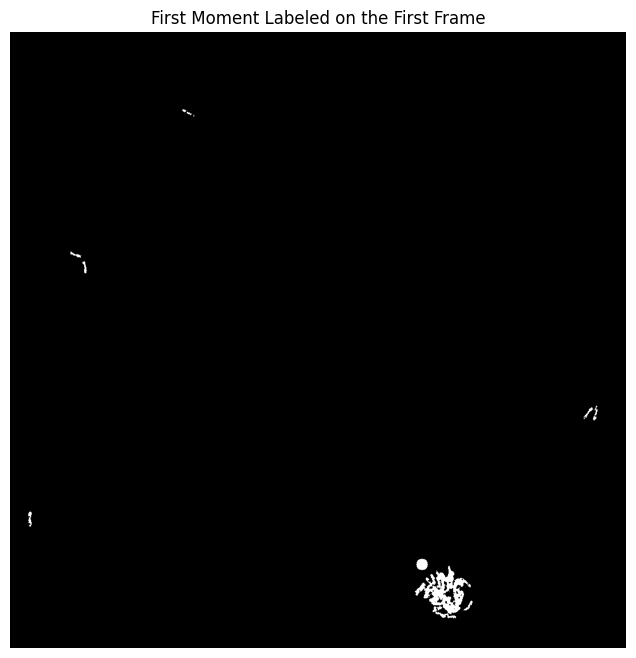

(722, 933)


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the first moment of ants in a frame
def thresholding(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, thresholded = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    return thresholded
def calculate_first_moment(thresholded):
    moments = cv2.moments(thresholded)
    first_moment = (int(moments['m10'] / moments['m00']), int(moments['m01'] / moments['m00']))
    return first_moment

# Open the video file
video_file = 'pnas_sm01_crop.mp4'
cap = cv2.VideoCapture(video_file)

# Read the first frame
ret, frame = cap.read()
if not ret:
    print("Error: Unable to read the video frame.")
else:
    # Calculate the first moment
    thresholded = thresholding(frame)
    flip  = 255 - thresholded
    first_moment = calculate_first_moment(flip)
    
    # Label the first moment on the frame
    cv2.circle(flip, first_moment, 10, (255, 255, 255), -1)  # Red circle at the first moment position

    # Display the frame with the labeled first moment
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(flip, cv2.COLOR_BGR2RGB))
    plt.title('First Moment Labeled on the First Frame')
    plt.axis('off')
    plt.show()

cap.release()
print(first_moment)

In [20]:
print(flip[0,0])

0


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the first and second moments of ants in a frame
def thresholding(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, thresholded = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    return thresholded
def calculate_moments(thresholded):
    moments = cv2.moments(thresholded)
    first_moment = (moments['m10'] / moments['m00'], moments['m01'] / moments['m00'])
    second_moment = (np.sqrt(moments['mu20'] / moments['m00']), np.sqrt(moments['mu02'] / moments['m00']))
    return first_moment, second_moment

def iterate_video_calculate_moments(video_file):
    cap = cv2.VideoCapture(video_file)
    # Lists to store moments and time points
    first_moments = []
    second_moments = []
    time_points = []

    frame_rate = int(cap.get(cv2.CAP_PROP_FPS))

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        thresholded = thresholding(frame)
        flip = 255 - thresholded # invert black and white pixel values so that the first/second moment is not biased by white (255) pixels
        first_moment, second_moment = calculate_moments(flip)
        first_moments.append(first_moment)
        second_moments.append(second_moment)
        time_points.append(cap.get(cv2.CAP_PROP_POS_MSEC) / 1000.0)

    cap.release()

    # Convert the lists to NumPy arrays
    first_moments = np.array(first_moments)
    second_moments = np.array(second_moments)
    time_points = np.array(time_points)
    return first_moments,second_moments,time_points

In [19]:
# process ordered video
video_file = 'ordered_response_to_temp_perturbation.mp4'
o1,o2,ot = iterate_video_calculate_moments(video_file)

# process disordered video
video_file = 'disordered_response_to_temp_perturbation.mp4'
d1,d2,dt = iterate_video_calculate_moments(video_file)

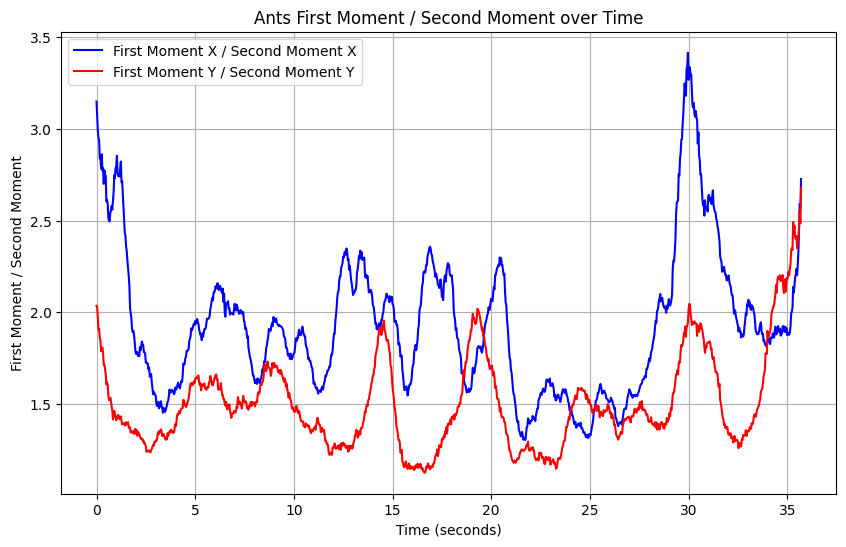

In [11]:
# Plot first moment over second moment as a function of time
plt.figure(figsize=(10, 6))
plt.plot(ot, o1[:, 0] / o2[:, 0], label='First Moment X / Second Moment X', color='blue')
plt.plot(ot, o1[:, 1] / o2[:, 1], label='First Moment Y / Second Moment Y', color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('First Moment / Second Moment')
plt.legend()
plt.title('Ants First Moment / Second Moment over Time')
plt.grid(True)
plt.show()

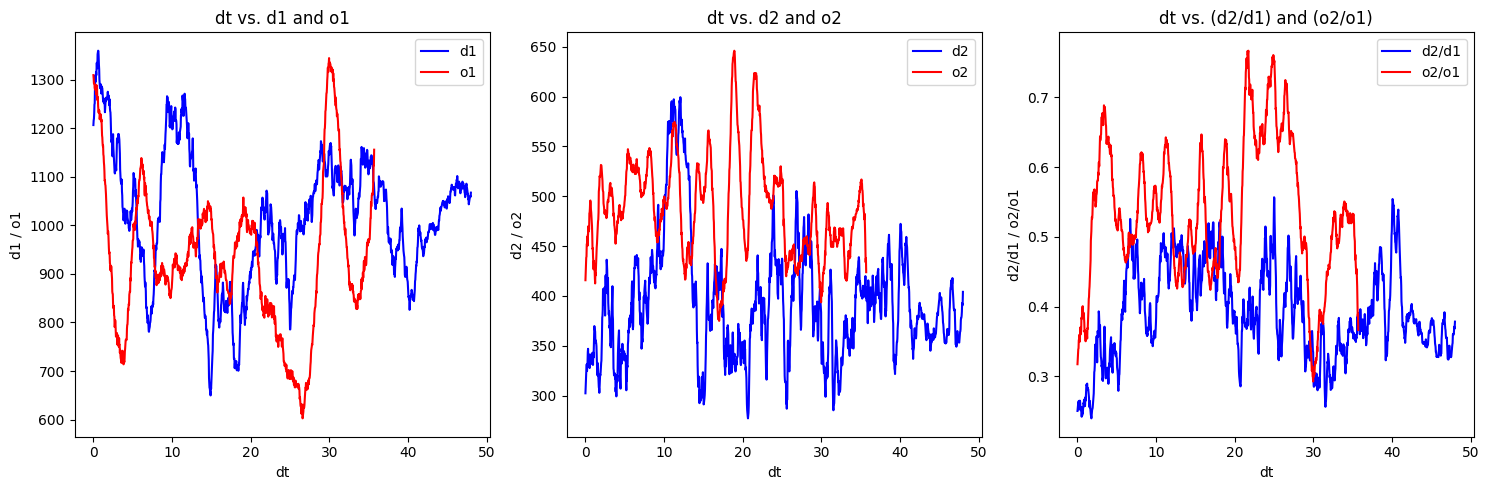

In [20]:
d1 = d1[:,0]
d2 = d2[:,0]
o1= o1[:,0]
o2 = o2[:,0]
# Calculate ratios
ratio_d = d2 / d1
ratio_o = o2 / o1

# Create a figure with three subplots in a row
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# First plot (dt vs. d1 and dt vs. o1)
axs[0].plot(dt, d1, label="d1", color="blue")
axs[0].plot(ot, o1, label="o1", color="red")
axs[0].set_xlabel("dt")
axs[0].set_ylabel("d1 / o1")
axs[0].set_title("dt vs. d1 and o1")
axs[0].legend()

# Second plot (dt vs. d2 and dt vs. o2)
axs[1].plot(dt, d2, label="d2", color="blue")
axs[1].plot(ot, o2, label="o2", color="red")
axs[1].set_xlabel("dt")
axs[1].set_ylabel("d2 / o2")
axs[1].set_title("dt vs. d2 and o2")
axs[1].legend()

# Third plot (dt vs. (d2/d1) and dt vs. (o2/o1))
axs[2].plot(dt, ratio_d, label="d2/d1", color="blue")
axs[2].plot(ot, ratio_o, label="o2/o1", color="red")
axs[2].set_xlabel("dt")
axs[2].set_ylabel("d2/d1 / o2/o1")
axs[2].set_title("dt vs. (d2/d1) and (o2/o1)")
axs[2].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [22]:
# new line of thoughts - find centroids of individual ants
def calculate_moments(video_path):
    # Load the video
    video = cv2.VideoCapture(video_path)

    # Initialize lists to hold x and y coordinates
    x_coords = []
    y_coords = []

    # Iterate over each frame of the video
    while True:
       ret, frame = video.read()

       # If the frame could not be retrieved, we've run out of frames
       if not ret:
          break

       # Convert the frame to grayscale
       gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

       # Apply a binary threshold to the image
       _, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

       # Find the contours of the threshold image
       contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

       for contour in contours:
          # Calculate the moment of the contour
          M = cv2.moments(contour)

          # Calculate the centroid of the contour
          cX = int(M['m10'] / M['m00'])          
          cY = int(M['m01'] / M['m00'])          # Add the centroid coordinates to our lists
          x_coords.append(cX)
          y_coords.append(cY)

    # Calculate first moments (center of mass)
    x_com = np.mean(x_coords)
    y_com = np.mean(y_coords)

    # Calculate second moments (variance)
    x_var = np.var(x_coords)
    y_var = np.var(y_coords)

    return (x_com, y_com), (x_var, y_var)

# Calculate moments for both videos
ordered_com, ordered_var = calculate_moments('ordered_response_to_temp_perturbation.mp4')
#disordered_com, disordered_var = calculate_moments('disordered.mp4')

# Calculate the order parameter for both videos
ordered_order_parameter = ordered_var[0] / ordered_com[0], ordered_var[1] / ordered_com[1]
#disordered_order_parameter = disordered_var[0] / disordered_com[0], disordered_var[1] / disordered_com[1]

print(f'Ordered video order parameter: {ordered_order_parameter}')
print(f'Disordered video order parameter: {disordered_order_parameter}')

ZeroDivisionError: float division by zero

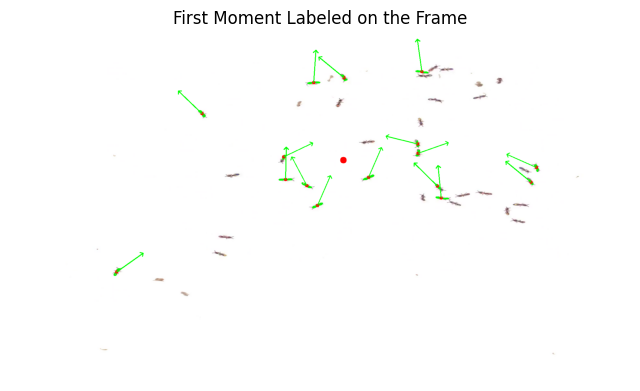

Centroid (Weighted by Area): (1032.1897200167155, 396.8144588382783)
Mean Distance to Centroid: 322.8928091529639
Variance of Distances: 34493.445618520935


In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# debug findContour
video_file = 'disordered_response_to_temp_perturbation.mp4'
cap = cv2.VideoCapture(video_file)

######## access a particular frame ##############
# Frame number to retrieve (in your case, the 23rd frame)
frame_number = 900

# Initialize a frame counter
current_frame = 0

while True:
    # Read a frame from the video
    ret, frame = cap.read()
    
    # Break the loop if we've reached the end of the video or the desired frame
    if not ret or current_frame == frame_number:
        break
    
    # Increment the frame counter
    current_frame += 1
########################################################

# Initialize lists to store ant centroids and distances
centroids = []
distances = []

# Read the first frame
ret, frame = cap.read()
if not ret:
    print("Error: Unable to read the video frame.")
    exit()

# Convert the frame to grayscale for contour detection
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
inverted_gray = 255-gray
_, thresholded = cv2.threshold(inverted_gray, 128, 255, cv2.THRESH_BINARY)

# Find contours in the grayscale frame
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Set minimum and maximum contour areas to filter ants
min_contour_area = 50  # Adjust this value based on your needs
#max_contour_area = 10000  # Adjust this value based on your needs

# Draw contours and centroids on the original frame
frame_with_contours = frame.copy()

weighted_sum_cX = 0
weighted_sum_cY = 0
total_contour_area = 0

for contour in contours:
    # Calculate the area of each contour
    contour_area = cv2.contourArea(contour)
    
    # Check if the contour area is within the specified range
    if min_contour_area <= contour_area:
        # Calculate the centroid of the contour
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0
        
        # Calculate the orientation angle of the ant (major axis)
        _, _, angle = cv2.fitEllipse(contour)
        
        # Convert the angle from degrees to radians
        angle_rad = np.deg2rad(angle)

        # Draw the contour and centroid on the frame
        cv2.drawContours(frame_with_contours, [contour], 0, (0, 255, 0), 2)  # Green contour
        cv2.circle(frame_with_contours, (cX, cY), 5, (0, 0, 255), -1)  # Red centroid
        # Calculate the endpoint of the arrow based on the orientation
        arrow_length = 100  # Length of the arrow
        endpoint_x = int(cX + arrow_length * np.cos(angle_rad))
        endpoint_y = int(cY - arrow_length * np.sin(angle_rad))  # Negative sin because of image coordinates
        cv2.arrowedLine(frame_with_contours, (cX, cY), (endpoint_x, endpoint_y), (0, 255, 0), 2)

        # Append the centroid to the centroids list
        centroids.append((cX, cY))
        weighted_sum_cX += cX * contour_area
        weighted_sum_cY += cY * contour_area
        total_contour_area += contour_area

# Calculate the contour area-weighted centroid position
if total_contour_area != 0:
    weighted_cX = weighted_sum_cX / total_contour_area
    weighted_cY = weighted_sum_cY / total_contour_area
else:
    # Handle the case where total_contour_area is zero to avoid division by zero
    weighted_cX, weighted_cY = 0, 0

cv2.circle(frame_with_contours, (int(weighted_cX), int(weighted_cY)), 10, (0, 0, 255), -1)  # Red centroid

# Calculate distances between each ant and the centroid
for cX, cY in centroids:
    distance = np.sqrt((cX - weighted_cX) ** 2 + (cY - weighted_cY) ** 2)
    distances.append(distance)

# Calculate mean and variance of distances
mean_distance = np.mean(distances)
variance_distance = np.var(distances)

# Display the frame with contours and centroids
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(frame_with_contours, cv2.COLOR_BGR2RGB))
plt.title('First Moment Labeled on the Frame')
plt.axis('off')
plt.show()

# Print the results
print(f"Centroid (Weighted by Area): ({weighted_cX}, {weighted_cY})")
print(f"Mean Distance to Centroid: {mean_distance}")
print(f"Variance of Distances: {variance_distance}")

# Release the video capture
cap.release()

c:\Users\lczbe\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\lczbe\anaconda3\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\lczbe\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\lczbe\anaconda3\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\lczbe\anaconda3\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


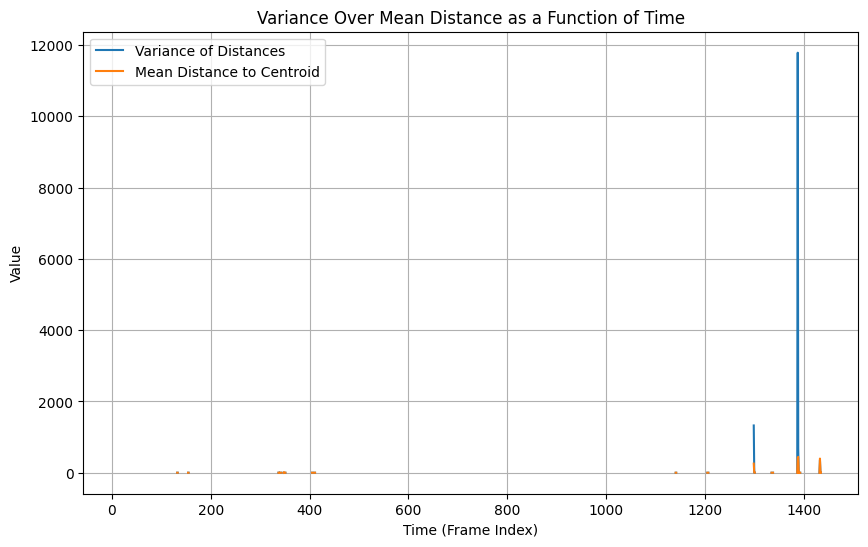

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Open the video file
video_file = 'disordered_response_to_temp_perturbation.mp4'
cap = cv2.VideoCapture(video_file)

# Initialize lists to store data over time
mean_distances = []
variances = []
# Set minimum and maximum contour areas to filter ants
min_contour_area = 200  # Adjust this value based on your needs
#max_contour_area = 5000  # Adjust this value based on your needs
frame_num=0

while True:
    frame_num+=1
    # Read a frame from the video
    ret, frame = cap.read()
    
    # Break the loop if we've reached the end of the video
    if not ret:
        break

    # Convert the frame to grayscale for contour detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    inverted_gray = 255-gray
    _, thresholded = cv2.threshold(inverted_gray, 128, 255, cv2.THRESH_BINARY)

    # Find contours in the grayscale frame
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize lists to store ant centroids and distances for each frame
    centroids = []
    distances = []
    contour_areas = []
    # Initialize variables for weighted sums and total contour area
    weighted_sum_cX = 0
    weighted_sum_cY = 0
    total_contour_area = 0

    for contour in contours:
        # Calculate the area of each contour
        contour_area = cv2.contourArea(contour)
        
        # Check if the contour area is within the specified range
        if min_contour_area <= contour_area:
            # Calculate the centroid of the contour
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
            else:
                cX, cY = 0, 0

            # # Draw the contour and centroid on the frame
            # cv2.drawContours(frame_with_contours, [contour], 0, (0, 255, 0), 2)  # Green contour
            # cv2.circle(frame_with_contours, (cX, cY), 5, (0, 0, 255), -1)  # Red centroid

            # Append the centroid to the centroids list
            centroids.append((cX, cY))
            weighted_sum_cX += cX * contour_area
            weighted_sum_cY += cY * contour_area
            total_contour_area += contour_area
            contour_areas.append(contour_area)

    # Calculate the contour area-weighted centroid position
    if total_contour_area != 0:
        weighted_cX = weighted_sum_cX / total_contour_area
        weighted_cY = weighted_sum_cY / total_contour_area
    else:
        # Handle the case where total_contour_area is zero to avoid division by zero
        weighted_cX, weighted_cY = 0, 0

    # Calculate distances between each ant and the centroid for this frame
    for cX, cY in centroids:
        distance = np.sqrt((cX - weighted_cX) ** 2 + (cY - weighted_cY) ** 2)
        distances.append(distance)

    # Calculate mean distance and variance for this frame
    if contour_areas!=[]:
        mean_distance = np.average(distances,weights=contour_areas)
        variance_distance = np.average((distances - mean_distance) ** 2, weights=contour_areas)
    else:
        mean_distance = np.mean(distances)
        variance_distance = np.var(distances)

    # Append the calculated values to the lists
    mean_distances.append(mean_distance)
    variances.append(variance_distance)

# Release the video capture
cap.release()

# Create a time array (frame index) for the x-axis
time = np.arange(len(variances))

# Plot variance over mean distance as a function of time
plt.figure(figsize=(10, 6))
plt.plot(time, variances, label='Variance of Distances')
plt.plot(time, mean_distances, label='Mean Distance to Centroid')
plt.xlabel('Time (Frame Index)')
plt.ylabel('Value')
plt.title('Variance Over Mean Distance as a Function of Time')
plt.legend()
plt.grid(True)
plt.show()

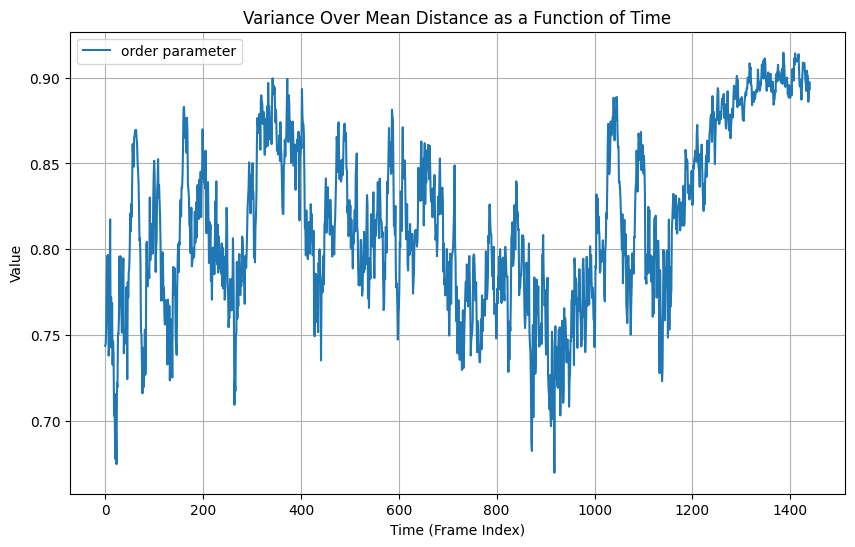

In [9]:
ratio = []
for sigma, mu in zip(variances, mean_distances):
    ratio.append(mu**2/(sigma+mu**2))
# Plot variance over mean distance as a function of time
plt.figure(figsize=(10, 6))
plt.plot(time, ratio, label='order parameter')
plt.xlabel('Time (Frame Index)')
plt.ylabel('Value')
plt.title('Variance Over Mean Distance as a Function of Time')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
################ functions to get average & variance ######################
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_mean_variance_time(video_file):
    # Open the video file

    cap = cv2.VideoCapture(video_file)

    # Initialize lists to store data over time
    mean_distances = []
    variances = []
    # Set minimum and maximum contour areas to filter ants
    min_contour_area = 15  # Adjust this value based on your needs
    #max_contour_area = 5000  # Adjust this value based on your needs
    frame_num=0

    while True:
        frame_num+=1
        # Read a frame from the video
        ret, frame = cap.read()
        
        # Break the loop if we've reached the end of the video
        if not ret:
            break

        # Convert the frame to grayscale for contour detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        inverted_gray = 255-gray
        _, thresholded = cv2.threshold(inverted_gray, 128, 255, cv2.THRESH_BINARY)

        # Find contours in the grayscale frame
        contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Initialize lists to store ant centroids and distances for each frame
        centroids = []
        distances = []
        contour_areas = []
        # Initialize variables for weighted sums and total contour area
        weighted_sum_cX = 0
        weighted_sum_cY = 0
        total_contour_area = 0

        for contour in contours:
            # Calculate the area of each contour
            contour_area = cv2.contourArea(contour)
            
            # Check if the contour area is within the specified range
            if min_contour_area <= contour_area:
                # Calculate the centroid of the contour
                M = cv2.moments(contour)
                if M["m00"] != 0:
                    cX = int(M["m10"] / M["m00"])
                    cY = int(M["m01"] / M["m00"])
                else:
                    cX, cY = 0, 0

                # # Draw the contour and centroid on the frame
                # cv2.drawContours(frame_with_contours, [contour], 0, (0, 255, 0), 2)  # Green contour
                # cv2.circle(frame_with_contours, (cX, cY), 5, (0, 0, 255), -1)  # Red centroid

                # Append the centroid to the centroids list
                centroids.append((cX, cY))
                weighted_sum_cX += cX * contour_area
                weighted_sum_cY += cY * contour_area
                total_contour_area += contour_area
                contour_areas.append(contour_area)

        # Calculate the contour area-weighted centroid position
        if total_contour_area != 0:
            weighted_cX = weighted_sum_cX / total_contour_area
            weighted_cY = weighted_sum_cY / total_contour_area
        else:
            # Handle the case where total_contour_area is zero to avoid division by zero
            weighted_cX, weighted_cY = 0, 0

        # Calculate distances between each ant and the centroid for this frame
        for cX, cY in centroids:
            distance = np.sqrt((cX - weighted_cX) ** 2 + (cY - weighted_cY) ** 2)
            distances.append(distance)

        # Calculate mean distance and variance for this frame
        if contour_areas!=[]:
            # unweighted calculation
            mean_distance = np.mean(distances)
            variance_distance = np.var(distances)
            # # weighted calculation
            # mean_distance = np.average(distances,weights=contour_areas)
            # variance_distance = np.average((distances - mean_distance) ** 2,weights=contour_areas)
        else:
            mean_distance = np.mean(distances)
            variance_distance = np.var(distances)

        # Append the calculated values to the lists
        mean_distances.append(mean_distance)
        variances.append(variance_distance)

    # Release the video capture
    cap.release()

    # Create a time array (frame index) for the x-axis
    time = np.arange(len(variances))
    return time, mean_distances, variances

def calculate_order_parameter(mean_distances,variances):
    ratio = []
    for sigma, mu in zip(variances, mean_distances):
        ratio.append(mu**2/(sigma+mu**2))
    return ratio

In [28]:
d_video_file = 'disordered_response_to_temp_perturbation.mp4'
d_t,d_mu,d_sigma = get_mean_variance_time(d_video_file)
d_ratio = calculate_order_parameter(d_mu,d_sigma)

o_video_file = 'ordered_response_to_temp_perturbation.mp4'
o_t,o_mu,o_sigma = get_mean_variance_time(o_video_file)
o_ratio = calculate_order_parameter(o_mu,o_sigma)

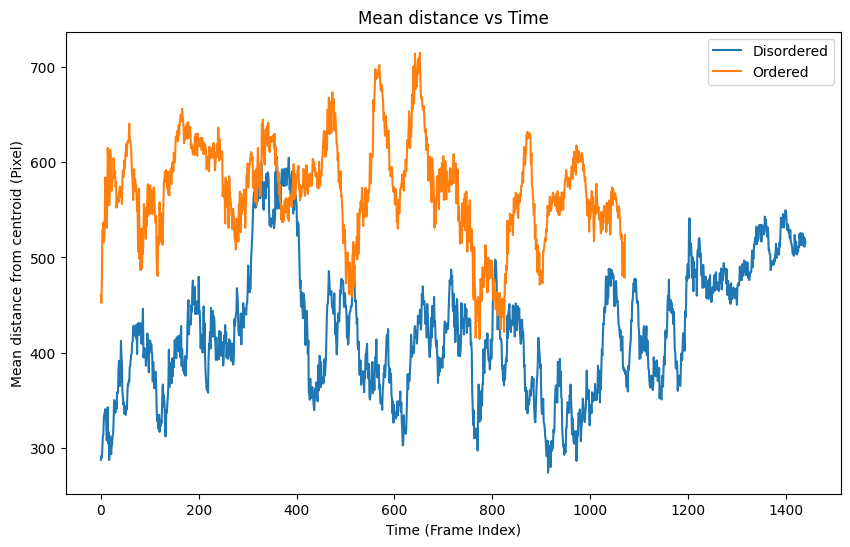

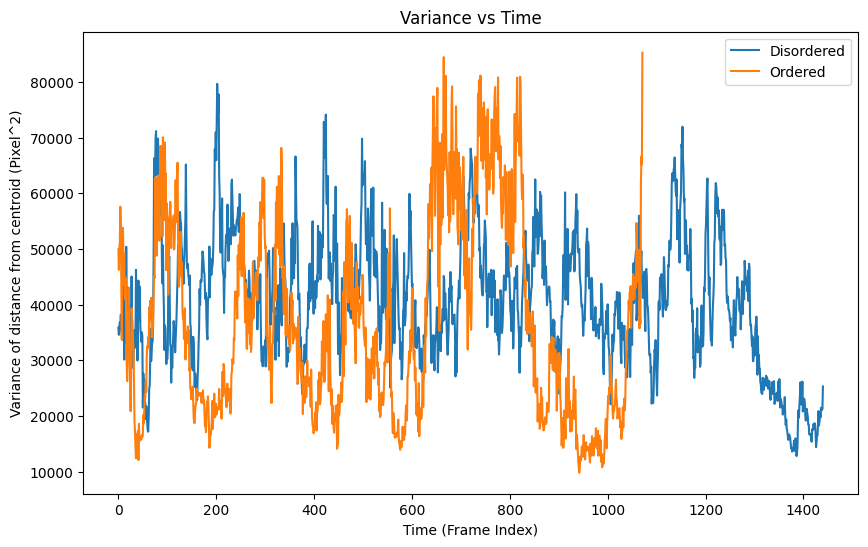

In [29]:
# Plot variance over mean distance as a function of time
plt.figure(figsize=(10, 6))
plt.plot(d_t,d_mu, label='Disordered')
plt.plot(o_t,o_mu,label='Ordered')
# plt.plot(o_t_s, o_ratio_s, label=f'Smoothed (Window Size {window_size})', linestyle='--')
# plt.plot(d_t_s, d_ratio_s, label=f'Smoothed (Window Size {window_size})', linestyle='--')
plt.xlabel('Time (Frame Index)')
plt.ylabel('Mean distance from centroid (Pixel)')
plt.title('Mean distance vs Time')
plt.legend()
plt.grid(False)
# plt.ylim([0.5,1])
plt.show()

# Plot variance over mean distance as a function of time
plt.figure(figsize=(10, 6))
plt.plot(d_t,d_sigma, label='Disordered')
plt.plot(o_t,o_sigma,label='Ordered')
# plt.plot(o_t_s, o_ratio_s, label=f'Smoothed (Window Size {window_size})', linestyle='--')
# plt.plot(d_t_s, d_ratio_s, label=f'Smoothed (Window Size {window_size})', linestyle='--')
plt.xlabel('Time (Frame Index)')
plt.ylabel('Variance of distance from centroid (Pixel^2)')
plt.title('Variance vs Time')
plt.legend()
plt.grid(False)
# plt.ylim([0.5,1])
plt.show()

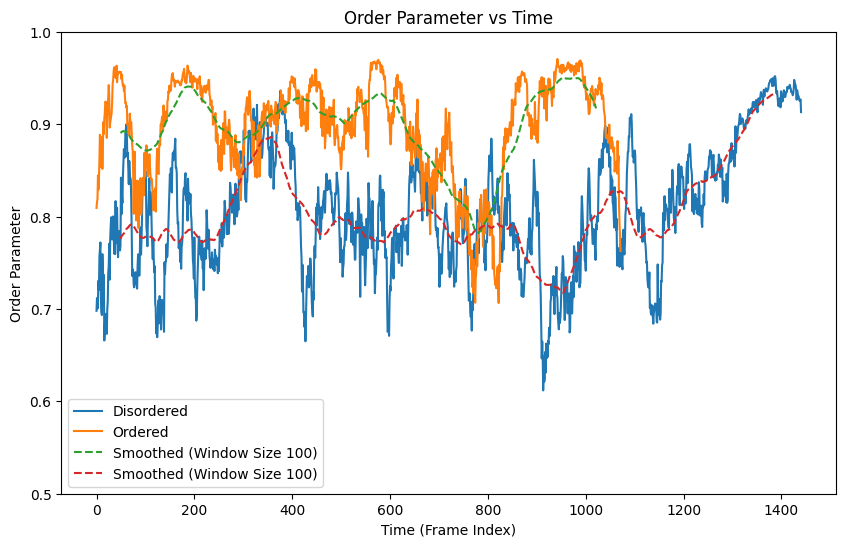

In [30]:
def smooth(time,data,window_size):
    data_s = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    time_s = time[(window_size-1)//2 : -(window_size-1)//2]
    return time_s,data_s

# Set the window size for the moving average
window_size = 100  # Adjust this based on your preference
# Calculate the moving average without end effects using NumPy
[o_t_s,o_ratio_s] = smooth(o_t,o_ratio,window_size)
[d_t_s,d_ratio_s] = smooth(d_t,d_ratio,window_size)


# Plot variance over mean distance as a function of time
plt.figure(figsize=(10, 6))
plt.plot(d_t,d_ratio, label='Disordered')
plt.plot(o_t,o_ratio,label='Ordered')
plt.plot(o_t_s, o_ratio_s, label=f'Smoothed (Window Size {window_size})', linestyle='--')
plt.plot(d_t_s, d_ratio_s, label=f'Smoothed (Window Size {window_size})', linestyle='--')
plt.xlabel('Time (Frame Index)')
plt.ylabel('Order Parameter')
plt.title('Order Parameter vs Time')
plt.legend()
plt.grid(False)
plt.ylim([0.5,1])
plt.show()

In [17]:
sm01_video_file = 'pnas_sm01_crop.mp4'
sm01_t,sm01_mu,sm01_sigma = get_mean_variance_time(sm01_video_file)
sm01_ratio = calculate_order_parameter(sm01_mu,sm01_sigma)

sm02_video_file = 'pnas_sm02_crop.mp4'
sm02_t,sm02_mu,sm02_sigma = get_mean_variance_time(sm02_video_file)
sm02_ratio = calculate_order_parameter(sm02_mu,sm02_sigma)

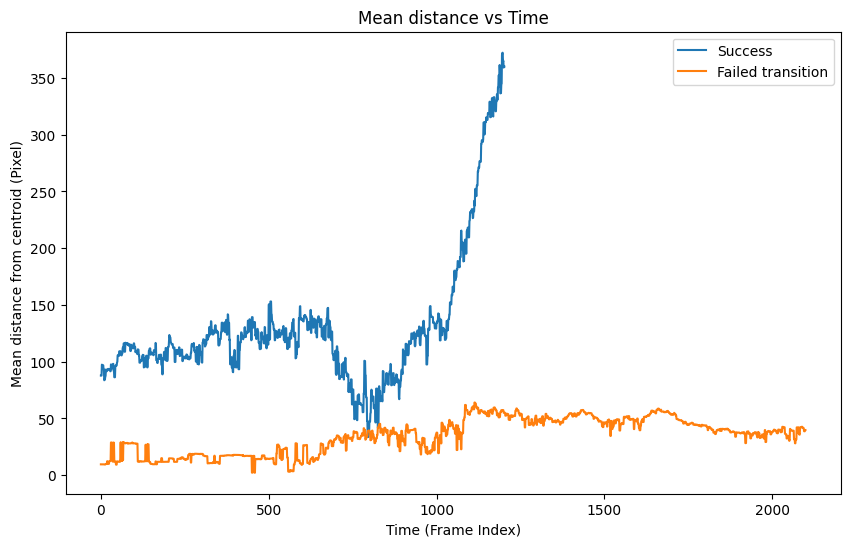

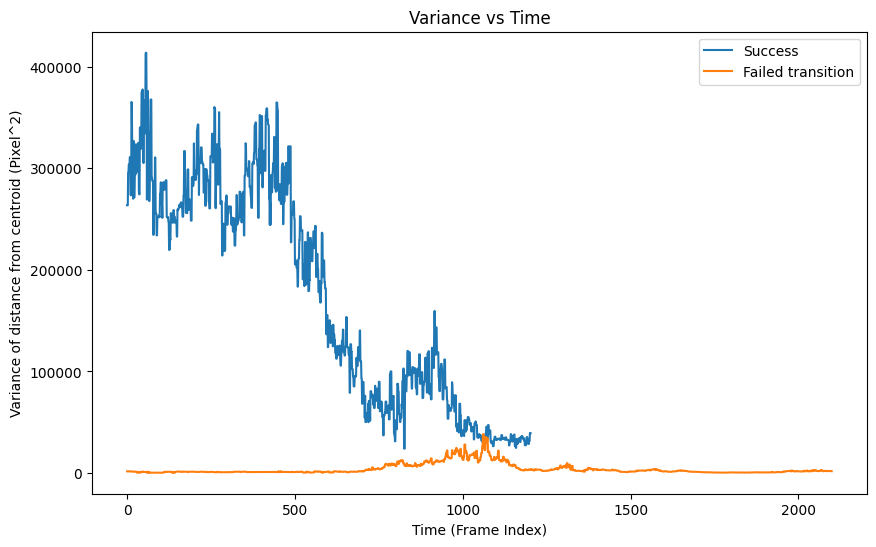

In [18]:
# Plot variance over mean distance as a function of time
plt.figure(figsize=(10, 6))
plt.plot(sm01_t,sm01_mu, label='Success')
plt.plot(sm02_t,sm02_mu,label='Failed transition')
# plt.plot(o_t_s, o_ratio_s, label=f'Smoothed (Window Size {window_size})', linestyle='--')
# plt.plot(d_t_s, d_ratio_s, label=f'Smoothed (Window Size {window_size})', linestyle='--')
plt.xlabel('Time (Frame Index)')
plt.ylabel('Mean distance from centroid (Pixel)')
plt.title('Mean distance vs Time')
plt.legend()
plt.grid(False)
# plt.ylim([0.5,1])
plt.show()

# Plot variance over mean distance as a function of time
plt.figure(figsize=(10, 6))
plt.plot(sm01_t,sm01_sigma, label='Success')
plt.plot(sm02_t,sm02_sigma,label='Failed transition')
# plt.plot(o_t_s, o_ratio_s, label=f'Smoothed (Window Size {window_size})', linestyle='--')
# plt.plot(d_t_s, d_ratio_s, label=f'Smoothed (Window Size {window_size})', linestyle='--')
plt.xlabel('Time (Frame Index)')
plt.ylabel('Variance of distance from centroid (Pixel^2)')
plt.title('Variance vs Time')
plt.legend()
plt.grid(False)
# plt.ylim([0.5,1])
plt.show()

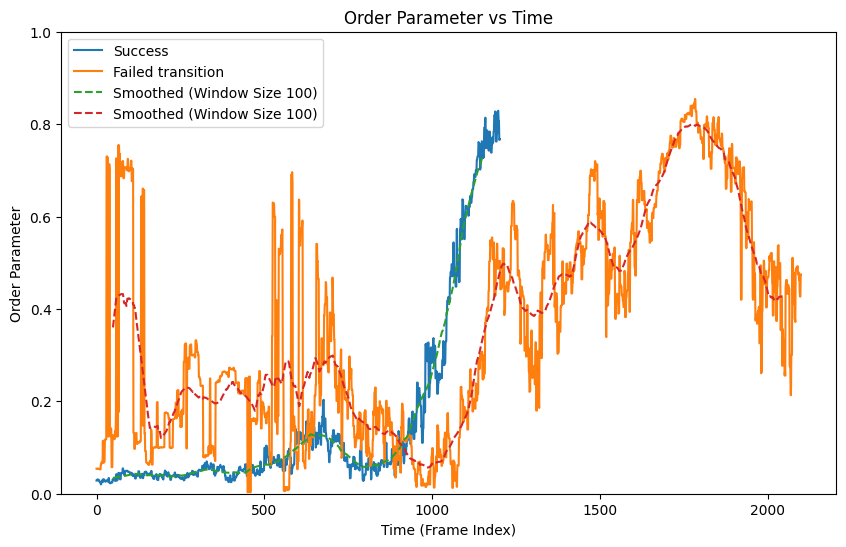

In [19]:
def smooth(time,data,window_size):
    data_s = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    time_s = time[(window_size-1)//2 : -(window_size-1)//2]
    return time_s,data_s

# Set the window size for the moving average
window_size = 100  # Adjust this based on your preference
# Calculate the moving average without end effects using NumPy
[sm01_t_s,sm01_ratio_s] = smooth(sm01_t,sm01_ratio,window_size)
[sm02_t_s,sm02_ratio_s] = smooth(sm02_t,sm02_ratio,window_size)


# Plot variance over mean distance as a function of time
plt.figure(figsize=(10, 6))
plt.plot(sm01_t,sm01_ratio, label='Success')
plt.plot(sm02_t,sm02_ratio, label='Failed transition')
plt.plot(sm01_t_s, sm01_ratio_s, label=f'Smoothed (Window Size {window_size})', linestyle='--')
plt.plot(sm02_t_s, sm02_ratio_s, label=f'Smoothed (Window Size {window_size})', linestyle='--')
plt.xlabel('Time (Frame Index)')
plt.ylabel('Order Parameter')
plt.title('Order Parameter vs Time')
plt.legend()
plt.grid(False)
plt.ylim([0,1])
plt.show()